# AI Lab Test

#### TEAN JIN HE SD21063

Question 1

In [1]:
#b)
import random 

from deap import base, creator, tools

# Evaluation function
def eval_func(individual):
    target_sum = 25
    return len(individual) - abs(sum(individual) - target_sum),

# Create the toolbox with the right parameters
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Initialize the toolbox
    toolbox = base.Toolbox()

    # Generate attributes 
    toolbox.register("attr_bool", random.randint, 0, 1)

    # Initialize structures
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
        toolbox.attr_bool, num_bits)

    # Define the population to be a list of individuals
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register the evaluation operator 
    toolbox.register("evaluate", eval_func)

    # Register the crossover operator
    toolbox.register("mate", tools.cxTwoPoint)

    # Register a mutation operator
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

    # Operator for selecting individuals for breeding
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    return toolbox

if __name__ == "__main__":
    # Define the number of bits
    num_bits = 50

    # Create a toolbox using the above parameter
    toolbox = create_toolbox(num_bits)

    # Seed the random number generator
    random.seed(7)

    # Create an initial population of 200 individuals
    population = toolbox.population(n=200)

    # Define probabilities of crossing and mutating
    probab_crossing, probab_mutating  = 0.6, 0.3

    # Define the number of generations
    num_generations = 40
    
    print('\nStarting the evolution process')
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
    
    print('\nEvaluated', len(population), 'individuals')
    
    # Iterate through generations
    for g in range(num_generations):
        print("\n===== Generation", g)
        
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            # Cross two individuals
            if random.random() < probab_crossing:
                toolbox.mate(child1, child2)

                # "Forget" the fitness values of the children
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            # Mutate an individual
            if random.random() < probab_mutating:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print('Evaluated', len(invalid_ind), 'individuals')
        
        # The population is entirely replaced by the offspring
        population[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in population]
        
        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print('Min =', min(fits), ', Max =', max(fits))
        print('Average =', round(mean, 2), ', Standard deviation =', 
                round(std, 2))
    
    print("\n==== End of evolution")
    
    best_ind = tools.selBest(population, 1)[0]
    print('\nBest individual:\n', best_ind)
    print('\nNumber of ones:', sum(best_ind))


Starting the evolution process

Evaluated 200 individuals

===== Generation 0
Evaluated 141 individuals
Min = 44.0 , Max = 50.0
Average = 48.37 , Standard deviation = 1.23

===== Generation 1
Evaluated 151 individuals
Min = 45.0 , Max = 50.0
Average = 48.46 , Standard deviation = 1.28

===== Generation 2
Evaluated 150 individuals
Min = 43.0 , Max = 50.0
Average = 48.55 , Standard deviation = 1.35

===== Generation 3
Evaluated 151 individuals
Min = 43.0 , Max = 50.0
Average = 48.86 , Standard deviation = 1.25

===== Generation 4
Evaluated 150 individuals
Min = 44.0 , Max = 50.0
Average = 48.81 , Standard deviation = 1.3

===== Generation 5
Evaluated 145 individuals
Min = 44.0 , Max = 50.0
Average = 48.85 , Standard deviation = 1.15

===== Generation 6
Evaluated 150 individuals
Min = 44.0 , Max = 50.0
Average = 48.84 , Standard deviation = 1.21

===== Generation 7
Evaluated 149 individuals
Min = 43.0 , Max = 50.0
Average = 48.81 , Standard deviation = 1.25

===== Generation 8
Evaluated 

Question 2

In [2]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# import all methods and classes from the tkinter
from tkinter import *

# Function for clearing the
# contents of all entry boxes
# And text area.
def clearAll() :

	# deleting the content from the entry box
	negativeField.delete(0, END)
	neutralField.delete(0, END)
	positiveField.delete(0, END)
	overallField.delete(0, END)

	# whole content of text area is deleted
	textArea.delete(1.0, END)
	
# function to print sentiments
# of the sentence.
def detect_sentiment():

	# get a whole input content from text box
	sentence = textArea.get("1.0", "end")

	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()

	# polarity_scores method of SentimentIntensityAnalyzer
	# object gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)

	string = str(sentiment_dict['neg']*100) + "% Negative"
	negativeField.insert(10, string)
	

	string = str(sentiment_dict['neu']*100) + "% Neutral"
	neutralField.insert(10, string)

	string = str(sentiment_dict['pos']*100) +"% Positive"
	positiveField.insert(10, string)
	
	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.05 :
		string = "Positive"

	elif sentiment_dict['compound'] <= - 0.05 :
		string = "Negative"
	

	else :
		string = "Neutral"

	overallField.insert(10, string)
		


# Driver Code
if __name__ == "__main__" :
	

	# Create a GUI window
	gui = Tk()
	
	# Set the background colour of GUI window
	gui.config(background = "light green")

	# set the name of tkinter GUI window
	gui.title("Sentiment Detector")

	# Set the configuration of GUI window
	gui.geometry("250x400")

	# create a label : Enter Your Task
	enterText = Label(gui, text = "Enter Your Sentence",
									bg = "light green")

	# create a text area for the root
	# with lunida 13 font
	# text area is for writing the content
	textArea = Text(gui, height = 10, width = 45, font = "lucida 13")

	# create a Submit Button and place into the root window
	# when user press the button, the command or
	# function affiliated to that button is executed
	check = Button(gui, text = "Check Sentiment", fg = "Black",
						bg = "Red", command = detect_sentiment)

	# Create a negative : label
	negative = Label(gui, text = "sentence was rated as: ",
										bg = "light green")

	# Create a neutral : label
	neutral = Label(gui, text = "sentence was rated as: ",
									bg = "light green")

	# Create a positive : label
	positive = Label(gui, text = "sentence was rated as: ",
										bg = "light green")

	# Create a overall : label
	overall = Label(gui, text = "Sentence Overall Rated As: ",
										bg = "light green")

	# create a text entry box
	negativeField = Entry(gui)

	# create a text entry box
	neutralField = Entry(gui)

	# create a text entry box
	positiveField = Entry(gui)

	# create a text entry box
	overallField = Entry(gui)

	# create a Clear Button and place into the root window
	# when user press the button, the command or
	# function affiliated to that button is executed .
	clear = Button(gui, text = "Clear", fg = "Black",
					bg = "Red", command = clearAll)
	
	# create a Exit Button and place into the root window
	# when user press the button, the command or
	# function affiliated to that button is executed .
	Exit = Button(gui, text = "Exit", fg = "Black",
						bg = "Red", command = exit)

	# grid method is used for placing
	# the widgets at respective positions
	# in table like structure.
	enterText.grid(row = 0, column = 2)
	
	textArea.grid(row = 1, column = 2, padx = 10, sticky = W)
	
	check.grid(row = 2, column = 2)
	
	negative.grid(row = 3, column = 2)
	
	neutral.grid(row = 5, column = 2)
	
	positive.grid(row = 7, column = 2)
	
	overall.grid(row = 9, column = 2)
	
	negativeField.grid(row = 4, column = 2)

	neutralField.grid(row = 6, column = 2)
					
	positiveField.grid(row = 8, column = 2)
	
	overallField.grid(row = 10, column = 2)
	
	clear.grid(row = 11, column = 2)
	
	Exit.grid(row = 12, column = 2)

	# start the GUI
	gui.mainloop()

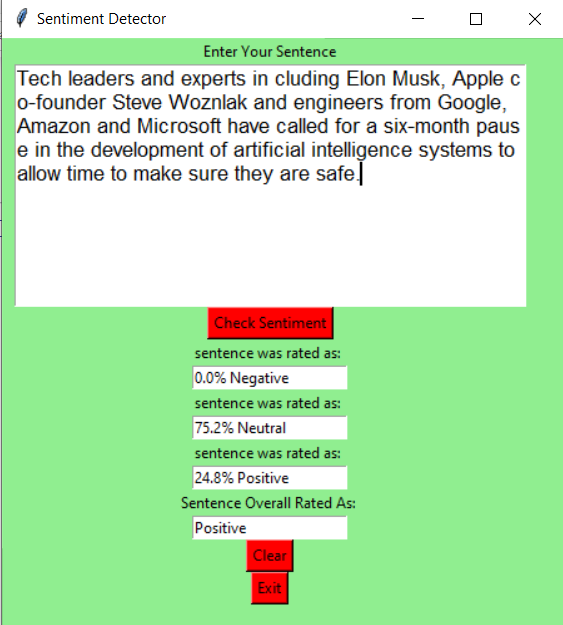

In [3]:
from IPython.display import Image
Image("results question 2.png")

Question 3

In [4]:
import cv2
import numpy as np

# Define a class to handle object tracking related functionality
class ObjectTracker(object):
    def __init__(self, scaling_factor=0.5):
        # Initialize the video capture object
        self.cap = cv2.VideoCapture(0)

        # Capture the frame from the webcam
        _, self.frame = self.cap.read()

        # Scaling factor for the captured frame
        self.scaling_factor = scaling_factor

        # Resize the frame
        self.frame = cv2.resize(self.frame, None, 
                fx=self.scaling_factor, fy=self.scaling_factor, 
                interpolation=cv2.INTER_AREA)

        # Create a window to display the frame
        cv2.namedWindow('Object Tracker')

        # Set the mouse callback function to track the mouse
        cv2.setMouseCallback('Object Tracker', self.mouse_event)

        # Initialize variable related to rectangular region selection
        self.selection = None

        # Initialize variable related to starting position 
        self.drag_start = None

        # Initialize variable related to the state of tracking 
        self.tracking_state = 0

    # Define a method to track the mouse events
    def mouse_event(self, event, x, y, flags, param):
        # Convert x and y coordinates into 16-bit numpy integers
        x, y = np.int16([x, y]) 

        # Check if a mouse button down event has occurred
        if event == cv2.EVENT_LBUTTONDOWN:
            self.drag_start = (x, y)
            self.tracking_state = 0

        # Check if the user has started selecting the region
        if self.drag_start:
            if flags & cv2.EVENT_FLAG_LBUTTON:
                # Extract the dimensions of the frame
                h, w = self.frame.shape[:2]

                # Get the initial position
                xi, yi = self.drag_start

                # Get the max and min values
                x0, y0 = np.maximum(0, np.minimum([xi, yi], [x, y]))
                x1, y1 = np.minimum([w, h], np.maximum([xi, yi], [x, y]))

                # Reset the selection variable
                self.selection = None

                # Finalize the rectangular selection
                if x1-x0 > 0 and y1-y0 > 0:
                    self.selection = (x0, y0, x1, y1)

            else:
                # If the selection is done, start tracking  
                self.drag_start = None
                if self.selection is not None:
                    self.tracking_state = 1

    # Method to start tracking the object
    def start_tracking(self):
        # Iterate until the user presses the Esc key
        while True:
            # Capture the frame from webcam
            _, self.frame = self.cap.read()
            
            # Resize the input frame
            self.frame = cv2.resize(self.frame, None, 
                    fx=self.scaling_factor, fy=self.scaling_factor, 
                    interpolation=cv2.INTER_AREA)

            # Create a copy of the frame
            vis = self.frame.copy()

            # Convert the frame to HSV colorspace
            hsv = cv2.cvtColor(self.frame, cv2.COLOR_BGR2HSV)

            # Create the mask based on predefined thresholds
            mask = cv2.inRange(hsv, np.array((0., 60., 32.)), 
                        np.array((180., 255., 255.)))

            # Check if the user has selected the region
            if self.selection:
                # Extract the coordinates of the selected rectangle
                x0, y0, x1, y1 = self.selection

                # Extract the tracking window
                self.track_window = (x0, y0, x1-x0, y1-y0)

                # Extract the regions of interest 
                hsv_roi = hsv[y0:y1, x0:x1]
                mask_roi = mask[y0:y1, x0:x1]

                # Compute the histogram of the region of 
                # interest in the HSV image using the mask
                hist = cv2.calcHist( [hsv_roi], [0], mask_roi, 
                        [16], [0, 180] )

                # Normalize and reshape the histogram
                cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX);
                self.hist = hist.reshape(-1)

                # Extract the region of interest from the frame
                vis_roi = vis[y0:y1, x0:x1]

                # Compute the image negative (for display only)
                cv2.bitwise_not(vis_roi, vis_roi)
                vis[mask == 0] = 0

            # Check if the system in the "tracking" mode
            if self.tracking_state == 1:
                # Reset the selection variable
                self.selection = None
                
                # Compute the histogram back projection
                hsv_backproj = cv2.calcBackProject([hsv], [0], 
                        self.hist, [0, 180], 1)

                # Compute bitwise AND between histogram 
                # backprojection and the mask
                hsv_backproj &= mask

                # Define termination criteria for the tracker
                term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 
                        10, 1)

                # Apply CAMShift on 'hsv_backproj'
                track_box, self.track_window = cv2.CamShift(hsv_backproj, 
                        self.track_window, term_crit)

                # Draw an ellipse around the object
                cv2.ellipse(vis, track_box, (0, 255, 0), 2)

            # Show the output live video
            cv2.imshow('Object Tracker', vis)

            # Stop if the user hits the 'Esc' key
            c = cv2.waitKey(5)
            if c == 27:
                break

        # Close all the windows
        cv2.destroyAllWindows()

if __name__ == '__main__':
	# Start the tracker
    ObjectTracker().start_tracking()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


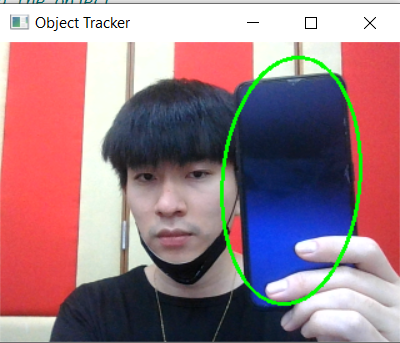

In [5]:
from IPython.display import Image
Image("results question 3.png")

Question 4

In [6]:
import numpy as np
import skfuzzy.control as ctrl
import skfuzzy as fuzzy

#Antecedent is used for input parameters and Consequent is used for output. Here s,o and d are input and r is output.
s=ctrl.Antecedent(np.arange(0,11,1),'s') #S marks range 0-10
o=ctrl.Antecedent(np.arange(0,11,1),'o') #O marks range 0-10
d=ctrl.Antecedent(np.arange(0,11,1),'d') #D marks range 0-10
r=ctrl.Consequent(np.arange(0,11,1),'r') #cgpa between 0-10

#now we consider poor Severity(S) when marks are between 0-5, average when marks between 4-7.5 and good when marks between 7-10.

s['poor']=fuzzy.trimf(s.universe,[0,3,5])
s['average']=fuzzy.trimf(s.universe,[4,6,7.5])
s['good']=fuzzy.trimf(s.universe,[7,9,10])

#now we consider bad Occurrence(O) when marks are between 0-5, decent when marks between 4-7.5 and great when marks between 7-10.

o['bad']=fuzzy.trimf(o.universe,[0,3,5])
o['decent']=fuzzy.trimf(o.universe,[4,6,7.5])
o['great']=fuzzy.trimf(o.universe,[7,9,10])

#now we consider bad Detection(D) when marks are between 0-5, decent when marks between 4-7.5 and great when marks between 7-10.

d['bad']=fuzzy.trimf(d.universe,[0,3,5])
d['decent']=fuzzy.trimf(d.universe,[4,6,7.5])
d['great']=fuzzy.trimf(d.universe,[7,9,10])

#now we consider low Risk(R) when marks are between 0-5, medium when marks between 4-7.5 and high when marks between 7-10.

r['low']=fuzzy.trimf(r.universe,[0,3,5])
r['medium']=fuzzy.trimf(r.universe,[4,6,7.5])
r['high']=fuzzy.trimf(r.universe,[7,9,10])

D:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


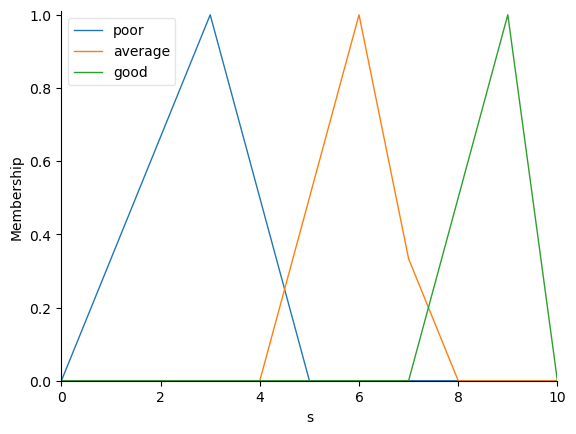

In [7]:
s.view()

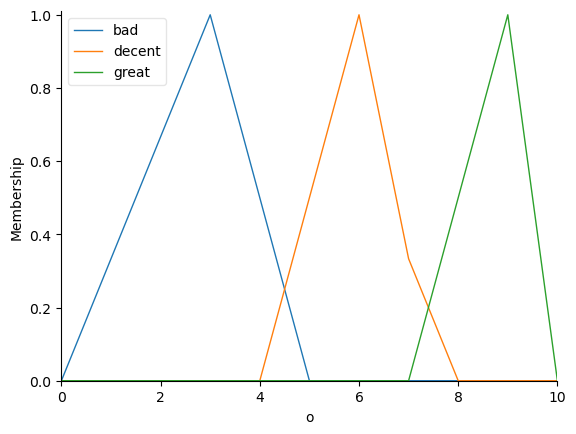

In [8]:
o.view()

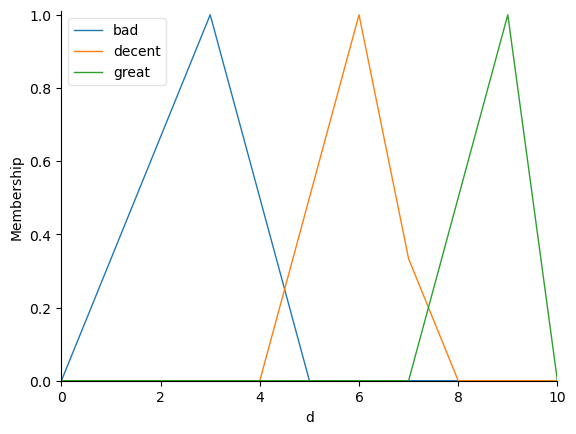

In [9]:
d.view()

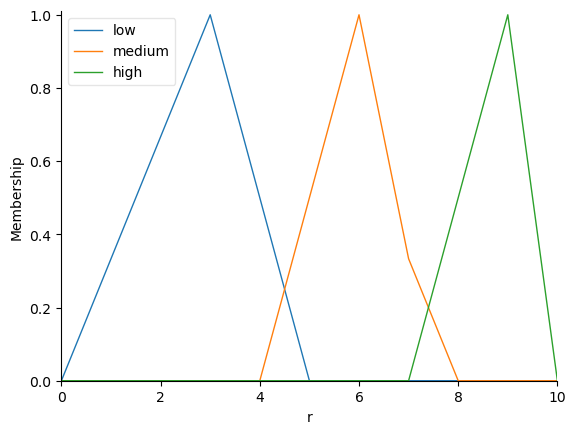

In [10]:
r.view()

Risk level:  5.909090909090908


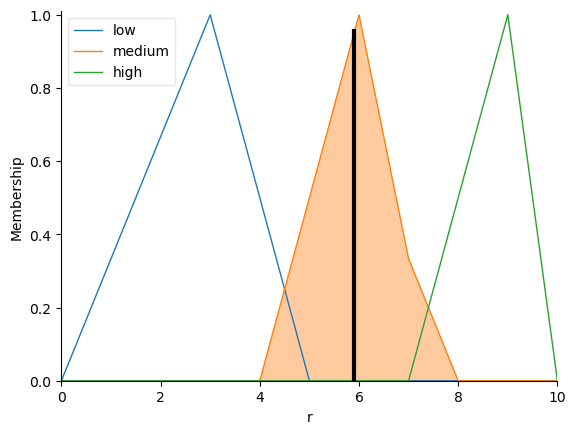

In [11]:
#now we will decide rules based on creteria of Severity(S), Occurrence(O) and Detection(D).

rule1 = ctrl.Rule(s['poor'] | o['bad'] | d['bad'], r['low'])
rule2 = ctrl.Rule(s['average'], r['medium'])
rule3 = ctrl.Rule(s['good'] | o['great'] | d['great'], r['high'])
rule4 = ctrl.Rule(o['decent'], r['medium'])
rule5 = ctrl.Rule(d['decent'], r['medium'])
#pass the value to ControlSystem and Simulate before calculating actual output.

risk_calc = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
risk_sim = ctrl.ControlSystemSimulation(risk_calc)

#Now pass input as 
risk_sim.input['s'] = 7
risk_sim.input['o'] = 7
risk_sim.input['d'] = 6

risk_sim.compute() #calculate the risk level

print("Risk level: ", risk_sim.output['r']) #print result
r.view(sim=risk_sim) #visualize output risk

Question 5

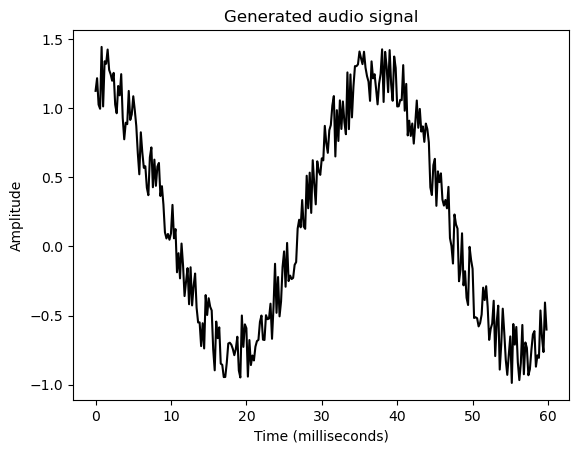

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Output file where the audio will be saved 
output_file = 'generated_audio.wav'

# Specify audio parameters
duration = 10  # in seconds
sampling_freq = 5000  # in Hz
tone_freq = 800 #in Hz
min_val = -10 * np.pi
max_val = 10 * np.pi

# Generate the audio signal
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

# Add some noise to the signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save the audio signal in the output file 
write(output_file, sampling_freq, signal_scaled)

# Extract the first 300 values from the audio signal 
signal = signal[:300]

# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq) 

# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()